In [4]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

import skimage

from skimage.morphology import watershed, disk, skeletonize
from skimage import measure
from skimage import exposure
from skimage import filters

In [5]:
def connected_component_labels(image_array):
    filled_image = ndi.binary_fill_holes(image_array)
    label_image = measure.label(filled_image, background=0)
    thresholded_image = thresholdImage2(label_image)
    plt.figure(figsize=(18, 7))
    ax = plt.subplot(131)
    ax.imshow(image_array, cmap='gray')
    ax.axis('off')
    
    ax2 = plt.subplot(132)
    ax2.imshow(label_image, cmap='nipy_spectral')
    
    my_list = []
    counter = 0
    for cell in measure.regionprops(label_image):
        if cell.area>1000:
            my_cell = cell
            center_of_mass_y, center_of_mass_x = cell.centroid
            #ax2.scatter(center_of_mass_x, center_of_mass_y, c='white')
            my_list.append((center_of_mass_x, center_of_mass_y))
        counter = counter + 1
    print(len(my_list))
        
    skeletonized_image = skeletonize(image_array)
    return label_image

In [6]:
def crop_image(image):
    print(image.shape)
    counter = 1
    reg_props = measure.regionprops(image)
    my_objects = ndi.find_objects(image)
    for cell, cur_slice in zip(reg_props, my_objects):
        if cell.area>1000:
            minr, minc, maxr, maxc = cell.bbox
            #rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  #fill=False, edgecolor='red', linewidth=2)
                
            x, y, w, h = minr-5, minc-5, maxr+5, maxc+5 # make the box a little bigger
            print(x, y, w, h)
            if y<0:
                y = 0
            if x<0:
                x = 0
            if h > 696:
                h = 696
            if w>520:
                w=520
            print('-----')
            print(x, y, w, h)
            cropped_image = image[x:w, y:h]
            plt.imsave('newest_cropped_image{}.jpeg'.format(counter), cropped_image)
            
        counter = counter + 1
        

In [7]:
def thresholdImage2(picture):
    #newImage = Image.new(picture.mode, picture.size)
    image = np.asanyarray(picture)
    imageThreshold = filters.threshold_otsu(image)
    image_array = image < imageThreshold
    return image_array

17
(520, 696)
-5 311 31 399
-----
0 311 31 399
-5 474 34 565
-----
0 474 34 565
11 550 99 643
-----
11 550 99 643
16 431 114 540
-----
16 431 114 540
114 431 217 526
-----
114 431 217 526
146 330 228 410
-----
146 330 228 410
207 381 302 480
-----
207 381 302 480
262 470 352 562
-----
262 470 352 562
280 69 373 162
-----
280 69 373 162
282 324 359 404
-----
282 324 359 404
301 -5 399 47
-----
301 0 399 47
339 225 436 316
-----
339 225 436 316
347 500 447 588
-----
347 500 447 588
388 417 473 505
-----
388 417 473 505
410 36 493 117
-----
410 36 493 117
451 95 525 191
-----
451 95 520 191
464 338 525 420
-----
464 338 520 420


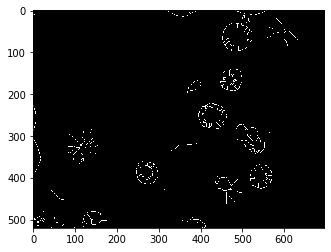

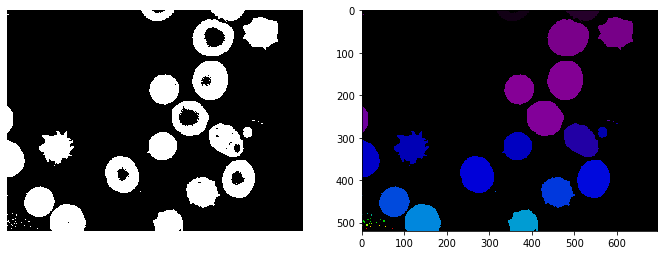

In [8]:
image = skimage.io.imread('Malaria_5Slices_sl1_ch1_p23_t1.png')
threshold_image = thresholdImage2(image)
skeletonized_image = skeletonize(threshold_image)
plt.imshow(skeletonized_image, cmap='gray')
connected_image = connected_component_labels(threshold_image)
crop_image(connected_image)